# Modelos lineares de regressão

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from scipy.stats import t as t_dis

## Gerando os dados

In [2]:
np.random.seed(100)

mu0, mu1, n = 0, 3, 10
X = np.around(
    np.random.multivariate_normal(
        [mu0, mu1], np.eye(2), size=n
    ),
    2
)
e = np.around(np.random.normal(size=n), 2)
beta = [3, 10, -2]
y = beta[0] + beta[1] * X[:,0] +  beta[2] * X[:,1] + e
y = np.around(y, 2)

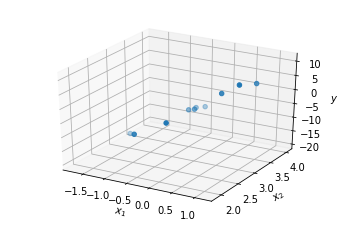

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], y)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.dist = 11

## Gerando tabelas para slides

In [4]:
toy = pd.DataFrame(
    np.hstack([X, y.reshape(-1, 1)]),
    columns=['$x_1$', '$x_2$', '$y$']
)

In [5]:
print(
    toy.set_index(
        toy.index + 1
    ).to_latex(escape=False)
)

\begin{tabular}{lrrr}
\toprule
{} &  $x_1$ &  $x_2$ &    $y$ \\
\midrule
1  &  -1.75 &   3.34 & -19.56 \\
2  &   1.15 &   2.75 &  10.54 \\
3  &   0.98 &   3.51 &   5.53 \\
4  &   0.22 &   1.93 &   0.50 \\
5  &  -0.19 &   3.26 &  -5.24 \\
6  &  -0.46 &   3.44 &  -7.54 \\
7  &  -0.58 &   3.82 &  -9.71 \\
8  &   0.67 &   2.90 &   5.26 \\
9  &  -0.53 &   4.03 & -10.69 \\
10 &  -0.44 &   1.88 &  -5.10 \\
\bottomrule
\end{tabular}



In [6]:
toy['$x_0$'] = 1

print(
    toy[['$x_0$', '$x_1$', '$x_2$', '$y$']].set_index(
        toy.index + 1
    ).to_latex(escape=False)
)

\begin{tabular}{lrrrr}
\toprule
{} &  $x_0$ &  $x_1$ &  $x_2$ &    $y$ \\
\midrule
1  &      1 &  -1.75 &   3.34 & -19.56 \\
2  &      1 &   1.15 &   2.75 &  10.54 \\
3  &      1 &   0.98 &   3.51 &   5.53 \\
4  &      1 &   0.22 &   1.93 &   0.50 \\
5  &      1 &  -0.19 &   3.26 &  -5.24 \\
6  &      1 &  -0.46 &   3.44 &  -7.54 \\
7  &      1 &  -0.58 &   3.82 &  -9.71 \\
8  &      1 &   0.67 &   2.90 &   5.26 \\
9  &      1 &  -0.53 &   4.03 & -10.69 \\
10 &      1 &  -0.44 &   1.88 &  -5.10 \\
\bottomrule
\end{tabular}



## Funções de ajuste e predição

In [26]:
def fit(X, y):
    X1 = np.hstack(
        [np.ones((len(X), 1)), X]
    )
    beta_hat = np.linalg.inv(X1.T @ X1) @ X1.T @ y
    return beta_hat

def predict(X, beta):
    return beta[0] + X @ beta[1:]

In [8]:
beta_hat = fit(X, y)

In [9]:
print(beta_hat)

[ 2.90978614  9.91248941 -1.81105788]


## Colunas correlacionadas

In [25]:
X_bad = np.hstack(
    [
        X[:,0].reshape(-1, 1), 
        3 * X[:,0].reshape(-1, 1)
    ]
)

y_bad = beta[0] + beta[1] * X_bad[:,0] +  beta[2] * X_bad[:,1] + e
beta_bad = fit(X_bad, y_bad)
print(beta_bad)
print(predict(X_bad, beta_bad))
print(y_bad)

[ 12.56515163  28.02938416 -80.22866139]
[ 384.71420163 -231.98993837 -195.83831637  -34.21930037   52.96990563
  110.38718763  135.90597963 -129.91477037  125.27314963  106.13405563]
[-2.38  9.14  6.67  3.04  2.42  2.1   1.41  7.04  0.55  1.3 ]


In [11]:
def fit_pinv(X, y):
    X1 = np.hstack(
        [np.ones((len(X), 1)), X]
    )
    beta_hat = np.linalg.pinv(X1.T @ X1) @ X1.T @ y
    return beta_hat

In [22]:
beta_bad_pinv = fit_pinv(X_bad, y_bad)
print(beta_bad_pinv)
print(predict(X_bad, beta_bad_pinv))
print(y_bad)

[3.48928877 0.38740728 1.16222184]
[-3.29033862  7.94447248  7.28588011  4.34158478  2.75321494  1.70721529
  1.24232655  6.08491754  1.43603019  1.78469674]
[-2.38  9.14  6.67  3.04  2.42  2.1   1.41  7.04  0.55  1.3 ]


## Significância dos coeficientes $\hat{\beta}$

In [24]:
y_hat = predict(X, beta_hat)
toy_y = pd.DataFrame(
    np.hstack([y.reshape(-1, 1), y_hat.reshape(-1, 1)]),
    columns=['$y$', '$\hat{y}$']
)
print(
    toy_y.set_index(
        toy_y.index + 1
    ).to_latex(escape=False)
)

\begin{tabular}{lrr}
\toprule
{} &    $y$ &  $\hat{y}$ \\
\midrule
1  & -19.56 & -20.486004 \\
2  &  10.54 &   9.328740 \\
3  &   5.53 &   6.267213 \\
4  &   0.50 &   1.595192 \\
5  &  -5.24 &  -4.877636 \\
6  &  -7.54 &  -7.879998 \\
7  &  -9.71 &  -9.757699 \\
8  &   5.26 &   4.299086 \\
9  & -10.69 &  -9.642397 \\
10 &  -5.10 &  -4.856498 \\
\bottomrule
\end{tabular}



In [14]:
def variance(X, y, beta):
    y_hat = predict(X, beta)
    N, p = X.shape[0], X.shape[1]
    return np.sum((y - y_hat) ** 2) / (N - p - 1)

In [15]:
def diag_XTX(X):
    X1 = np.hstack(
        [np.ones((len(X), 1)), X]
    )
    return np.diag(X1.T @ X1)

In [16]:
def beta_p_value(beta_hat, X, y):
    N, p = X.shape[0], X.shape[1]
    print(N - p - 1)
    var = variance(X, y, beta_hat)
    diag = diag_XTX(X)
    t = beta_hat / (np.sqrt(var) * np.sqrt(diag))
    c_dis = t_dis.cdf(t, N - p - 1)
    c_dis[c_dis > 0.5] = 1 - c_dis[c_dis > 0.5]
    print(t_dis.ppf(0.975, N - p - 1))
    return t, c_dis * 2

In [17]:
t_stats, p_value = beta_p_value(beta_hat, X, y)

7
2.3646242510102993


In [18]:
toy_beta = pd.DataFrame(
    np.hstack(
        [
            beta_hat.reshape(-1, 1), 
            t_stats.reshape(-1, 1), 
            p_value.reshape(-1, 1)
        ]
    ),
    columns=['$\hat{\beta}_j$', '$t_j$', 'p-value']
)
print(
    toy_beta.to_latex(escape=False)
)

\begin{tabular}{lrrr}
\toprule
{} &  $\hat{eta}_j$ &     $t_j$ &   p-value \\
\midrule
0 &        2.909786 &  0.962557 &  0.367834 \\
1 &        9.912489 &  3.947141 &  0.005552 \\
2 &       -1.811058 & -0.189449 &  0.855117 \\
\bottomrule
\end{tabular}

